# Figure6 ChromHMM Overlap vs SPAN

In [26]:
import os

import pandas as pd
from pathlib import Path

from IPython.display import display

import downstream.bed_metrics as bm
import downstream.loci_of_interest as loi

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib.backends.backend_pdf import PdfPages

N_THREADS = 8

In [27]:
# Ensure project configured
! echo $WASHU_ROOT
! echo $PYTHONPATH

/mnt/stripe/washu
/mnt/stripe/washu:/mnt/stripe/washu:


In [28]:
data_root = Path("/mnt/stripe/bio/experiments/configs/Y20O20")
loi_path = data_root / "loci_of_interest"
hists = ['H3K4me1', 'H3K4me3', 'H3K27ac', 'H3K27me3', 'H3K36me3']

This notebook builds necessary plots from the scratch the alternative is to calculate using all loci pipeline:

```
#! python /mnt/stripe/washu/downstream/reports/loci_intersection_report.py -o /mnt/stripe/bio/experiments/aging/loci_of_interest/tuned8_plots -p 24 --skip-stats --tool zinbra
```

In [29]:
def build_overlap_metrics(result_pdf_path: Path, title,
                          a_paths, a_labels, b_paths, b_labels,
                          transpose=False,
                          figsize=(14,14)):
    
    metric_df_path = str(result_pdf_path.with_suffix(".csv"))
    result_pdf_path = str(result_pdf_path)

    print("Calculating overlap metrics:", result_pdf_path)

    if os.path.exists(metric_df_path):
        os.remove(metric_df_path)
    
    df = bm.bed_metric_table(a_paths, b_paths, jaccard=False, threads=N_THREADS)
    df.to_csv(metric_df_path)
    print("Overlap metrics:", metric_df_path)

    display(df.head())

    df.index = a_labels
    df.columns = b_labels

    if transpose:
        df = df.T

    with PdfPages(result_pdf_path) as pdf:
        for out in [None, pdf]:
            bm.plot_metric_heatmap(title, df, figsize=figsize, cbar=False, save_to=out)

## ChromHMM

In [30]:
chromhmm_root_path = loi_path / "chromhmm_encsr907lcd"
chromhmm_title = "ChromHMM (ENCSR907LCD)"

chromhmm_paths = list(chromhmm_root_path.glob("*.bed"))
chromhmm_paths[0]

PosixPath('/mnt/stripe/bio/experiments/configs/Y20O20/loci_of_interest/chromhmm_encsr907lcd/cd14_encsr907lcd_chromhmm18.hg19.10_EnhA2.bed')

In [31]:
chromhmm_paths.sort(key=lambda p: int(p.name.split(".")[2].split("_")[0]))

In [32]:
# long names
#chromhmm_labels = ["{} ({})".format(loi._CHROMHMM_ST_MAP[st], st.split("_")[0]) for st in (p.name.split(".")[2] for p in chromhmm_paths)]
# short names
chromhmm_labels = ["{} ({})".format(v[1], v[0]) for v in (p.name.split(".")[2].split("_") for p in chromhmm_paths)]
chromhmm_labels

['TssA (1)',
 'TssFlnk (2)',
 'TssFlnkU (3)',
 'TssFlnkD (4)',
 'Tx (5)',
 'TxWk (6)',
 'EnhG1 (7)',
 'EnhG2 (8)',
 'EnhA1 (9)',
 'EnhA2 (10)',
 'EnhWk (11)',
 'ZNF (12)',
 'Het (13)',
 'TssBiv (14)',
 'EnhBiv (15)',
 'ReprPC (16)',
 'ReprPCWk (17)',
 'Quies (18)']


## SPAN Tuned

In [33]:
span_weak_cons_path = loi_path / "weak_consensus"
span_paths = [span_weak_cons_path / "{}_span_weak_consensus.bed".format(h) for h in hists]
span_paths

[PosixPath('/mnt/stripe/bio/experiments/configs/Y20O20/loci_of_interest/weak_consensus/H3K4me1_span_weak_consensus.bed'),
 PosixPath('/mnt/stripe/bio/experiments/configs/Y20O20/loci_of_interest/weak_consensus/H3K4me3_span_weak_consensus.bed'),
 PosixPath('/mnt/stripe/bio/experiments/configs/Y20O20/loci_of_interest/weak_consensus/H3K27ac_span_weak_consensus.bed'),
 PosixPath('/mnt/stripe/bio/experiments/configs/Y20O20/loci_of_interest/weak_consensus/H3K27me3_span_weak_consensus.bed'),
 PosixPath('/mnt/stripe/bio/experiments/configs/Y20O20/loci_of_interest/weak_consensus/H3K36me3_span_weak_consensus.bed')]

## Overlap Heatmap

Calculating overlap metrics: /mnt/stripe/bio/experiments/configs/Y20O20/heatmap_overlap_chromhmm@weak_span.pdf
Overlap metrics: /mnt/stripe/bio/experiments/configs/Y20O20/heatmap_overlap_chromhmm@weak_span.csv


,H3K4me1_span_weak_consensus.bed,H3K4me3_span_weak_consensus.bed,H3K27ac_span_weak_consensus.bed,H3K27me3_span_weak_consensus.bed,H3K36me3_span_weak_consensus.bed
cd14_encsr907lcd_chromhmm18.hg19.1_TssA.bed,0.909339,0.825618,0.893661,0.014687,0.345108
cd14_encsr907lcd_chromhmm18.hg19.2_TssFlnk.bed,0.742424,0.541853,0.265524,0.049305,0.164680
cd14_encsr907lcd_chromhmm18.hg19.3_TssFlnkU.bed,0.980047,0.431467,0.798146,0.010325,0.403792
cd14_encsr907lcd_chromhmm18.hg19.4_TssFlnkD.bed,0.968961,0.272544,0.164338,0.022856,0.257136
cd14_encsr907lcd_chromhmm18.hg19.5_Tx.bed,0.287179,0.003149,0.061120,0.002146,0.987988


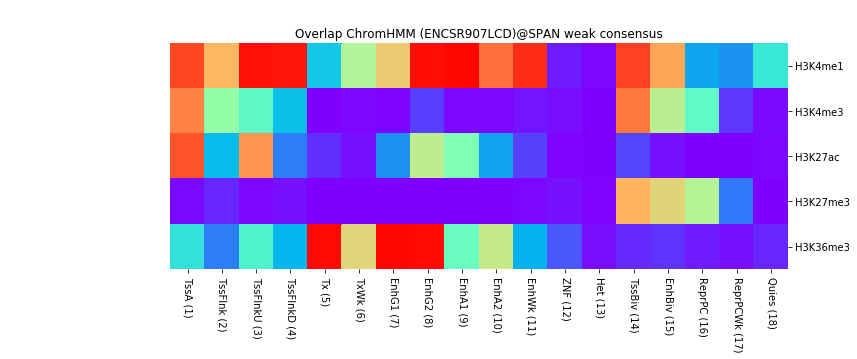

In [34]:
result_pdf_path = data_root / "heatmap_overlap_chromhmm@weak_span.pdf"

build_overlap_metrics(
    result_pdf_path, 'Overlap {}@SPAN weak consensus'.format(chromhmm_title),
    chromhmm_paths, chromhmm_labels, span_paths, hists, 
    transpose=True, figsize=(18, 6))

In [ ]:
result_pdf_path = data_root / "weak_span@heatmap_overlap_chromhmm.pdf"

build_overlap_metrics(
    result_pdf_path, 'Overlap SPAN weak consensus@{}'.format(chromhmm_title),
    span_paths, hists, chromhmm_paths, chromhmm_labels, figsize=(18, 6))

# Golden

In [ ]:
golden_paths = []
for h in hists:
    folder = "sicer" if h == "H3K36me3" else "macs_broad"
    golden_paths.append(data_root / "benchmark/{0}/{1}/consensus/{0}_{1}_weak_consensus.bed".format(h, folder))
golden_paths

In [ ]:
result_pdf_path = data_root / "heatmap_overlap_chromhmm@weak_golden.pdf"

build_overlap_metrics(
    result_pdf_path, 'Overlap GOLDEN weak consensus@{}'.format(chromhmm_title),
    chromhmm_paths, chromhmm_labels, golden_paths, hists, 
    transpose=True, figsize=(18, 6))

In [ ]:
result_pdf_path = data_root / "weak_golden@heatmap_overlap_chromhmm.pdf"

build_overlap_metrics(
    result_pdf_path, 'Overlap GOLDEN weak consensus@{}'.format(chromhmm_title),
    golden_paths, hists, chromhmm_paths, chromhmm_labels, figsize=(18, 6))

# Golden & SPAN

In [ ]:
tools_paths = []
tools_labels = []
for h in hists:
    for folder in ["span", "sicer" if h == "H3K36me3" else "macs_broad"]:
        tools_paths.append(data_root / "benchmark/{0}/{1}/consensus/{0}_{1}_weak_consensus.bed".format(h, folder))
        tool = "MACS2" if folder == "macs_broad" else folder.upper()
        tools_labels.append("{}: {}".format(tool, h))

In [ ]:
result_pdf_path = data_root / "heatmap_overlap_chromhmm@weak_tools.pdf"

build_overlap_metrics(
    result_pdf_path, 'Overlap weak consensus@{}'.format(chromhmm_title),
    chromhmm_paths, chromhmm_labels, tools_paths, tools_labels, 
    transpose=True, figsize=(14, 14))